In this notebook, use the MESA library to make a pre-main-sequence star: observe a cloud of material collapse and form a star. 


First, import camber and some utitilties including matplotlib, a tool to read MESA files, and smplotlib (to style the plot).


In [18]:
import camber
import smplotlib
import matplotlib.pyplot as plt
import mesa_reader as mr



Then start a single job.
It uses the inlist file that defines the star parameters.

Zbase sets the _metallicity_ of the star, which describes how rich it is in certain chemical elements. The initial mass is 1.0 solar masses (1x the mass of the sun). 




In [19]:
job = camber.mesa.create_job(command="./mk && ./rn")


Check the job status:


In [27]:
job.status

'COMPLETED'


You can create a partial plot as soon as the {job.status} is `RUNNING`.

The model stops running after 14 billion simulated years.
When the status is `COMPLETED`, run the following code one more time to make a full plot:



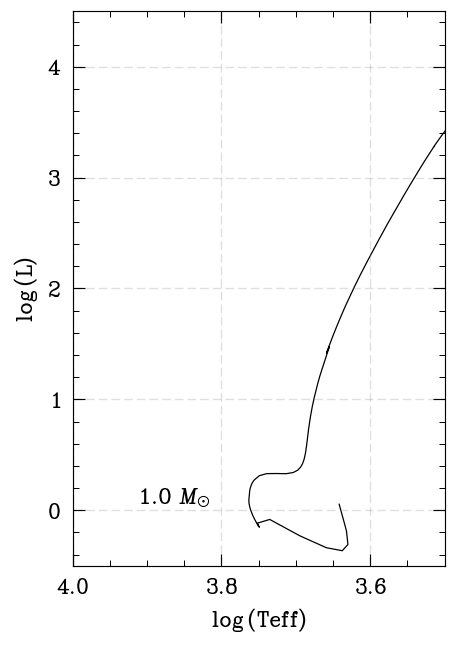

12.205041064997316


In [28]:
fig = plt.figure(figsize=(4,6))

h=mr.MesaData('LOGS/history.data')
plt.plot(h.log_Teff,h.log_L,linewidth=0.75,zorder=1,label=str(round(h.star_mass[0],4))+' $M_{\odot}$',color='black')
plt.annotate(str(round(h.star_mass[0],4))+' $M_{\odot}$', (max(h.log_Teff)+0.15,h.log_L[0]),fontsize=16)

plt.xlim(4.0,3.5)
plt.ylim(-0.5,4.5)

plt.grid(alpha=0.25)
plt.xlabel('$\log$(Teff)')
plt.ylabel('$\log$(L)')
plt.show()

print(max(h.star_age)/1.0e9)